In [163]:
#Importing the required libraries.
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from fancyimpute import KNN 

In [164]:
df = pd.read_csv('day.csv')

In [165]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [166]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [167]:
#Converting the data types of the required columns to categorical.
df.iloc[:,2:9] = df.iloc[:,2:9].astype('category')

In [168]:
df.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [169]:
#Removing the 'instant' and 'dteday' columns from the dataframe.
df = df.drop(['instant','dteday'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a47d61208>]],
      dtype=object)

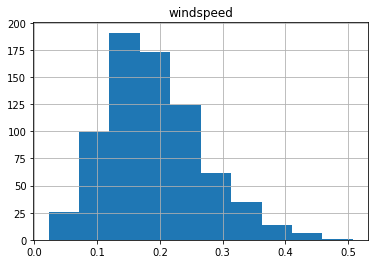

In [170]:
#Histogram for the 'windspeed' column.
df.hist(column='windspeed')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a47d61278>]],
      dtype=object)

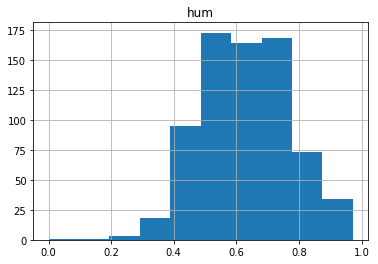

In [171]:
#Histogram for the 'hum' column.
df.hist(column='hum')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4811c940>]],
      dtype=object)

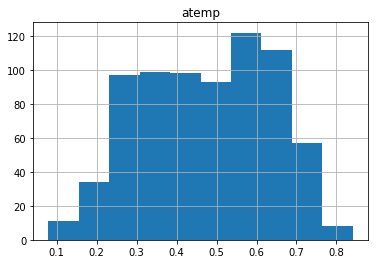

In [172]:
#Histogram for the 'atemp' column.
df.hist(column='atemp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4812ac18>]],
      dtype=object)

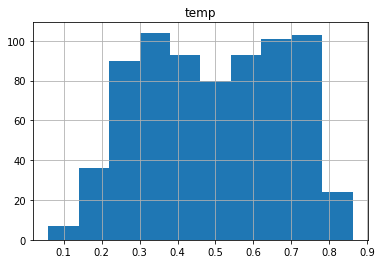

In [173]:
#Histogram for the 'temp' column.
df.hist(column='temp')

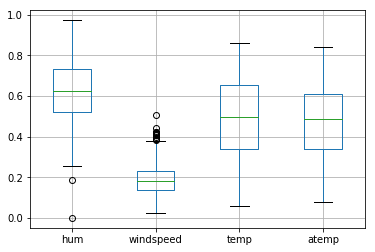

In [174]:
#Boxplot for the numeric columns. 
df.boxplot(column=['hum', 'windspeed', 'temp', 'atemp'])

In [175]:
#Correlation analysis for the numeric columns.
corr = df.iloc[:,7:14].corr()

In [176]:
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [177]:
df.temp.describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [178]:
df.atemp.describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

In [179]:
#There is a value which is zero, which is clearly an outlier.
df.hum.describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64

In [180]:
df.windspeed.describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

In [181]:
df.casual.describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64

In [182]:
df.registered.describe()

count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: registered, dtype: float64

In [183]:
df['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [184]:
#Removing the outlier from the 'hum' column.
q75, q25 = np.percentile(df.loc[:,'hum'], [75 ,25])
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
df.loc[df.loc[:,'hum'] < min,: 'hum'] = np.nan
df.loc[df.loc[:,'hum'] > max,: 'hum'] = np.nan
#Imputing using KNN imputation.
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

0.20468725
1.0455212500000002
Imputing row 1/731 with 0 missing, elapsed time: 0.142
Imputing row 101/731 with 0 missing, elapsed time: 0.146
Imputing row 201/731 with 0 missing, elapsed time: 0.147
Imputing row 301/731 with 0 missing, elapsed time: 0.147
Imputing row 401/731 with 0 missing, elapsed time: 0.147
Imputing row 501/731 with 0 missing, elapsed time: 0.147
Imputing row 601/731 with 0 missing, elapsed time: 0.148
Imputing row 701/731 with 0 missing, elapsed time: 0.149


In [185]:
df.hum.describe()

count    731.000000
mean       0.629482
std        0.140019
min        0.254167
25%        0.521041
50%        0.627500
75%        0.730833
max        0.972500
Name: hum, dtype: float64

In [186]:
#Train - test split.
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-3], df['casual'], random_state=1000)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df.iloc[:,:-3], df['registered'], random_state=1000)

In [187]:
x_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
45,1.0,0.0,2.0,0.0,2.0,1.0,1.0,0.266087,0.254274,0.314348,0.291374
259,3.0,0.0,9.0,0.0,6.0,0.0,2.0,0.491667,0.478512,0.718333,0.189675
403,1.0,1.0,2.0,0.0,3.0,1.0,2.0,0.256667,0.266421,0.722917,0.133721
121,2.0,0.0,5.0,0.0,1.0,1.0,2.0,0.549167,0.532833,0.730000,0.183454
536,2.0,1.0,6.0,0.0,3.0,1.0,1.0,0.782500,0.720975,0.592083,0.113812
551,3.0,1.0,7.0,0.0,4.0,1.0,1.0,0.827500,0.761367,0.457917,0.194029
103,2.0,0.0,4.0,0.0,4.0,1.0,1.0,0.467500,0.462742,0.540417,0.110700
578,3.0,1.0,8.0,0.0,3.0,1.0,1.0,0.717500,0.667308,0.677500,0.141179
709,4.0,1.0,12.0,0.0,1.0,1.0,2.0,0.435833,0.435575,0.925000,0.190308
362,1.0,0.0,12.0,0.0,4.0,1.0,1.0,0.248333,0.263892,0.574167,0.119412


In [188]:
x_train2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
45,1.0,0.0,2.0,0.0,2.0,1.0,1.0,0.266087,0.254274,0.314348,0.291374
259,3.0,0.0,9.0,0.0,6.0,0.0,2.0,0.491667,0.478512,0.718333,0.189675
403,1.0,1.0,2.0,0.0,3.0,1.0,2.0,0.256667,0.266421,0.722917,0.133721
121,2.0,0.0,5.0,0.0,1.0,1.0,2.0,0.549167,0.532833,0.730000,0.183454
536,2.0,1.0,6.0,0.0,3.0,1.0,1.0,0.782500,0.720975,0.592083,0.113812
551,3.0,1.0,7.0,0.0,4.0,1.0,1.0,0.827500,0.761367,0.457917,0.194029
103,2.0,0.0,4.0,0.0,4.0,1.0,1.0,0.467500,0.462742,0.540417,0.110700
578,3.0,1.0,8.0,0.0,3.0,1.0,1.0,0.717500,0.667308,0.677500,0.141179
709,4.0,1.0,12.0,0.0,1.0,1.0,2.0,0.435833,0.435575,0.925000,0.190308
362,1.0,0.0,12.0,0.0,4.0,1.0,1.0,0.248333,0.263892,0.574167,0.119412


In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
#Implementation of Linear Regression model.
lr = LinearRegression()

In [191]:
lr_mod = lr.fit(x_train, y_train)

In [192]:
cas = lr_mod.predict(x_test)
cas

array([ 399.70739844,  198.99838082, 1936.98611887, 1559.54318053,
        355.47949247, 1709.77721506, 1615.00452115,  501.71133763,
        -83.68332438,  562.85759945, 1042.09283604,   -5.84525099,
        293.20888897,  827.07013581,  573.18705079,   19.04855111,
        358.8069362 , -180.39033168, 1325.58344446, 1216.95217369,
        857.88152093, 1069.37639232, 1218.61525574, -147.82905134,
        921.54680863,  823.53720159, 1888.46558617, 1745.91940106,
        983.48737618, 1755.85660976,  759.91179884,  875.39698293,
        634.09888424,  109.33049628, -178.38652186,  655.84590198,
         31.21230925,  -66.96462674, -125.35459814, 1908.00683972,
        909.33701971,  892.41856147,  907.24337483, 1376.03170895,
       1161.04808268, 1463.17487393,  694.36598362,  818.70785791,
       1235.76704292, 1166.67435908, 1516.99423064,  347.97104232,
        862.97449691, 1175.01034295,  813.69550737, 1084.56157999,
       1447.8176053 ,   45.00676272, 1119.1200438 ,  874.39220

In [193]:
lr_mod2 = lr.fit(x_train2, y_train2)
reg = lr_mod2.predict(x_test2)
reg

array([3693.30460569, 3408.39771812, 3528.41041682, 4570.12057582,
       3833.63376997, 4809.86859096, 3995.41330809,  939.39762326,
       1785.51612023, 3188.73088992, 1371.52169708, 1617.60550247,
       2779.5658794 , 4577.145979  , 4544.49199948, 3064.97431628,
       2532.38026765, 1600.40111113, 3162.02866266, 5659.95949779,
       4992.76653672, 4391.57809085, 3687.41367369, 1701.41739141,
       5154.15144729, 4606.03940443, 4813.53988708, 4490.34962808,
       4255.37754148, 3177.84720109, 5251.60123474, 2442.22741855,
       4300.72822414, 4211.90002231, 1660.02413046, 3759.13800539,
       2025.60246177, 2286.17817821, 1387.15555444, 4491.63851219,
       5118.70072336, 3714.30662231, 1071.21326818, 4366.34881834,
       4550.31572151, 2449.15758334, 4384.37795037, 3618.96959317,
       5973.09784135, 2607.31519296, 6449.22193972, 4915.21966982,
       4669.93989152, 3950.24397912, 3608.58742793, 5404.16727812,
       2331.86821207, 2068.52391685, 1451.729381  , 5763.30784

In [194]:
cnt = (cas + reg).round()
cnt

array([4093., 3607., 5465., 6130., 4189., 6520., 5610., 1441., 1702.,
       3752., 2414., 1612., 3073., 5404., 5118., 3084., 2891., 1420.,
       4488., 6877., 5851., 5461., 4906., 1554., 6076., 5430., 6702.,
       6236., 5239., 4934., 6012., 3318., 4935., 4321., 1482., 4415.,
       2057., 2219., 1262., 6400., 6028., 4607., 1978., 5742., 5711.,
       3912., 5079., 4438., 7209., 3774., 7966., 5263., 5533., 5125.,
       4422., 6489., 3780., 2114., 2571., 6638., 5233., 3779., 3572.,
       2145., 3875., 3195., 2796., 3720., 5685., 7346., 3195., 1121.,
       3820., 7155., 4028., 5499., 6287., 3623., 5849., 3047., 2171.,
       6718., 6469., 6069., 4999., 7027., 2956., 7545., 6390., 5923.,
       2520., 3371., 4902., 4144., 6356., 4158., 6172., 6609., 7093.,
       5417., 3776., 3633., 1328., 3525., 3249., 5606., 5498., 5623.,
       4356.,  271., 7589., 4316., 5359., 2322., 4368., 6472., 4968.,
       6192., 3014., 4467., 6272., 6904., 7369., 4590., 3373., 1618.,
       6282., 1984.,

In [195]:
y_reg = y_test + y_test2
y_reg

311    4205.0
321    3392.0
189    5336.0
659    6824.0
389    4270.0
638    6889.0
462    6857.0
301     627.0
3      1562.0
128    4362.0
70     2132.0
69     1977.0
95     2808.0
444    6093.0
479    5633.0
352    3403.0
136    4123.0
65     1872.0
392    4023.0
580    7175.0
520    6998.0
187    4592.0
666    4459.0
33     1550.0
496    7030.0
500    5115.0
623    8714.0
617    8227.0
186    4629.0
218    3785.0
        ...  
452    5698.0
79     2077.0
631    7907.0
346    3523.0
550    7403.0
458    6772.0
167    4844.0
711    5319.0
547    5531.0
196    5923.0
304    4068.0
727    3095.0
656    7509.0
331    3867.0
484    6304.0
657    5424.0
299    2659.0
494    4717.0
339    2594.0
371    4521.0
1       801.0
23     1416.0
114    4073.0
227    4725.0
61     1685.0
98     2455.0
644    7965.0
239    4334.0
132    4105.0
511    6536.0
Length: 183, dtype: float64

In [196]:
#Calculating the MAPE for linear regression model.
y_reg, cnt = np.array(y_reg), np.array(cnt)
np.mean(np.abs((y_reg - cnt) / y_reg)) * 100

20.23742182679976

In [197]:
from sklearn.tree import DecisionTreeRegressor

In [198]:
#Implementing the decision tree model.
dt = DecisionTreeRegressor()

In [199]:
dt_mod = dt.fit(x_train, y_train) 
cas_dt = dt_mod.predict(x_test)
cas_dt

array([ 305.,  373., 1559., 2806.,  141., 2589., 2622.,  532.,  148.,
        847.,  885.,  307.,  663.,  342.,  663.,  168.,  684.,  221.,
       1201.,  964., 1242.,  748., 2806.,   75., 1045.,  342., 1208.,
       1208.,  668., 1249.,  841.,  364.,  760.,  191.,   75.,  118.,
        148.,   69.,    9., 2355., 1005.,  659.,  599., 1201., 1051.,
       1236.,  342.,  673.,  954., 1499.,  921.,  317., 1038.,  892.,
       1281., 1488., 2355.,  470., 1558.,  845.,  663., 2397., 1729.,
        181., 1435.,  684.,  456., 1029., 1524.,  921., 1603.,  362.,
        595.,  989.,  695.,  373., 1027.,  736., 1340.,  616.,  206.,
        667., 1045., 2643.,  303., 2355.,   75.,  964., 2589., 2230.,
       1120.,  892.,  419.,  615., 1729.,  141.,  611.,  845., 2153.,
       1051., 1201.,  255.,  150.,  713.,  898., 1058.,  307., 1051.,
       1514.,  217., 1088.,   65.,  797.,  536.,  663.,  795.,  647.,
       2512.,  440.,  878., 1120., 2345., 1379.,  253.,  428.,  251.,
       2557.,  172.,

In [200]:
dt_mod2 = dt.fit(x_train2, y_train2) 
reg_dt = dt_mod2.predict(x_test2)
reg_dt

array([3804., 3819., 3138., 5284., 3132., 5284., 2939.,  577., 1229.,
       3857., 1515., 1897., 1341., 5085., 4571., 3167., 3319., 1705.,
       2826., 6090., 5647., 3594., 5172., 1454., 5950., 5254., 5966.,
       5966., 3846., 2624., 5679.,  573., 5171., 1009., 1552., 1689.,
       1620., 1538., 1844., 4614., 5546., 3846., 1424., 4280., 4232.,
       2115., 5254., 3946., 6248., 2928., 5339., 5062., 5571., 3757.,
       4109., 6183., 2115., 2508., 2809., 6407., 4746., 3174., 3237.,
       2553., 2733., 1777., 2454., 2733., 3102., 6289., 3534., 2553.,
       3490., 6506., 4372., 5035., 6222., 3722., 5227., 1745., 1817.,
       6437., 6459., 5284., 3906., 3341., 3162., 6090., 5966., 5147.,
        856., 2697., 5283., 3672., 3237., 2948., 4495., 6520., 4451.,
       3896., 2733., 1379.,  768., 3554., 2302., 4680., 4659., 4377.,
       3647.,  975., 5825., 2085., 3843., 3203., 4122., 6820., 4370.,
       4614., 2448., 4488., 4446., 3308., 6750., 4134., 2493.,  953.,
       4419., 1299.,

In [201]:
cnt_dt = cas_dt + reg_dt
cnt_dt

array([4109., 4192., 4697., 8090., 3273., 7873., 5561., 1109., 1377.,
       4704., 2400., 2204., 2004., 5427., 5234., 3335., 4003., 1926.,
       4027., 7054., 6889., 4342., 7978., 1529., 6995., 5596., 7174.,
       7174., 4514., 3873., 6520.,  937., 5931., 1200., 1627., 1807.,
       1768., 1607., 1853., 6969., 6551., 4505., 2023., 5481., 5283.,
       3351., 5596., 4619., 7202., 4427., 6260., 5379., 6609., 4649.,
       5390., 7671., 4470., 2978., 4367., 7252., 5409., 5571., 4966.,
       2734., 4168., 2461., 2910., 3762., 4626., 7210., 5137., 2915.,
       4085., 7495., 5067., 5408., 7249., 4458., 6567., 2361., 2023.,
       7104., 7504., 7927., 4209., 5696., 3237., 7054., 8555., 7377.,
       1976., 3589., 5702., 4287., 4966., 3089., 5106., 7365., 6604.,
       4947., 3934., 1634.,  918., 4267., 3200., 5738., 4966., 5428.,
       5161., 1192., 6913., 2150., 4640., 3739., 4785., 7615., 5017.,
       7126., 2888., 5366., 5566., 5653., 8129., 4387., 2921., 1204.,
       6976., 1471.,

In [202]:
#MAPE for the decision tree model.
cnt_dt = np.array(cnt_dt)
np.mean(np.abs((y_reg - cnt_dt) / y_reg)) * 100

18.83230049813498

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
#Random forest model implementation.
rf = RandomForestRegressor(n_estimators=500)

In [205]:
rf_mod = rf.fit(x_train, y_train)
cas_rf = rf_mod.predict(x_test)
cas_rf

array([ 338.42 ,  324.624, 1963.602, 1952.996,  178.296, 2362.806,
       1929.32 ,  214.2  ,   75.098,  711.828,  865.24 ,  243.17 ,
        516.98 ,  840.796,  587.844,  258.056,  550.032,  191.012,
        845.312, 1093.066, 1078.372,  715.636, 1938.748,   91.224,
       1137.26 ,  685.232, 2532.152, 2390.254,  703.79 , 1720.322,
        835.112,  330.43 ,  796.576,  203.482,   71.744,  398.782,
        103.138,  143.316,   62.07 , 2314.362,  931.812,  760.464,
        856.126, 1070.606, 1015.716, 1615.57 ,  595.674,  651.836,
       1034.662, 1320.144, 1048.736,  280.504,  904.104,  798.362,
        970.138, 1182.206, 1742.192,  423.608, 1336.762,  868.898,
        735.952, 2266.202, 1727.446,  341.018, 1230.952,  557.45 ,
        358.564, 1043.286, 1571.074, 1046.634,  521.78 ,  269.824,
        566.892, 1029.868,  688.934,  311.868,  980.03 ,  862.276,
       1258.896,  597.94 ,  160.202,  782.198, 1019.074, 2369.372,
        472.784, 2155.83 ,  101.432, 1130.746, 2357.754, 2473.

In [206]:
rf_mod2 = rf.fit(x_train2, y_train2) 
reg_rf = rf_mod2.predict(x_test2)
reg_rf

array([3706.988, 3391.742, 3031.526, 4856.888, 3388.364, 4890.616,
       3958.958, 2075.932, 1298.982, 3904.922, 1379.316, 1712.332,
       1859.834, 5148.218, 4661.104, 3219.004, 3390.04 , 1591.594,
       2879.522, 5917.598, 5824.74 , 3655.138, 4607.168, 1438.564,
       5787.364, 4808.302, 5285.888, 4942.77 , 3740.194, 2653.718,
       6079.824, 1788.438, 5182.24 , 3229.09 , 1453.122, 2925.648,
       1356.828, 2094.796, 1475.588, 4299.932, 5370.514, 3955.36 ,
       1280.282, 4076.556, 4075.026, 2613.35 , 3595.762, 3735.048,
       5732.484, 2740.882, 5302.756, 4798.718, 5681.34 , 3658.564,
       4300.102, 6123.648, 2483.93 , 2433.158, 2710.738, 6228.558,
       4502.722, 3181.028, 3148.638, 2712.644, 2684.058, 2730.708,
       3207.938, 2755.294, 2945.57 , 5908.21 , 3469.28 , 2323.39 ,
       3708.132, 6084.204, 4133.366, 4964.154, 6640.924, 3252.108,
       5529.99 , 2569.238, 1604.692, 5797.08 , 6047.644, 4896.116,
       3060.86 , 4050.144, 2713.776, 5993.638, 4618.916, 4343.

In [207]:
cnt_rf = (cas_rf + reg_rf).round() 

In [208]:
#MAPE for the random forest model.
cnt_rf = np.array(cnt_rf)
np.mean(np.abs((y_reg - cnt_rf) / y_reg)) * 100

17.47445399968087